In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
data = []
labels = []
classes = 43

In [3]:
cur_path = os.getcwd()

In [4]:
cur_path

In [5]:
for i in range(classes):
    path = os.path.join(cur_path, 'data', 'Train', str(i))
    images = os.listdir(path)
    for i in images:
        try:
            image = Image.open(path + "\\" + i)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
os.mkdir('training')

In [8]:
np.save('./training/data', data)
np.save('./training/target', labels)

In [9]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, y_train.shape)

(31367, 30, 30, 3) (31367,)


In [13]:
X_train

array([[[[ 23,  20,  22],
         [ 24,  21,  23],
         [ 24,  22,  23],
         ...,
         [ 21,  19,  21],
         [ 20,  18,  20],
         [ 21,  19,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  20],
         [ 22,  21,  21],
         ...,
         [ 21,  18,  20],
         [ 21,  18,  21],
         [ 21,  19,  20]],

        [[ 21,  19,  20],
         [ 21,  20,  20],
         [ 22,  20,  21],
         ...,
         [ 20,  17,  19],
         [ 20,  18,  19],
         [ 21,  19,  20]],

        ...,

        [[ 21,  18,  20],
         [ 20,  19,  21],
         [ 21,  19,  20],
         ...,
         [ 19,  17,  18],
         [ 18,  17,  18],
         [ 19,  18,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  22],
         [ 23,  20,  21],
         ...,
         [ 19,  16,  18],
         [ 18,  17,  19],
         [ 19,  17,  19]],

        [[ 19,  17,  20],
         [ 20,  18,  20],
         [ 21,  19,  21],
         ...,
         [ 17,  15,  18],
        

Convert labels to onehot encoding

In [14]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
callback = EarlyStopping(mode="min", monitor="val_loss", patience=10)

In [17]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 

model.add(Flatten()) 

model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 50
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/50
981/981 [==============================] - 33s 33ms/step - loss: 1.6063 - accuracy: 0.5914 - val_loss: 0.2766 - val_accuracy: 0.9313
Epoch 2/50
981/981 [==============================] - 32s 33ms/step - loss: 0.4189 - accuracy: 0.8829 - val_loss: 0.1102 - val_accuracy: 0.9708
Epoch 3/50
981/981 [==============================] - 32s 33ms/step - loss: 0.2755 - accuracy: 0.9227 - val_loss: 0.2047 - val_accuracy: 0.9521
Epoch 4/50
981/981 [==============================] - 32s 33ms/step - loss: 0.2382 - accuracy: 0.9366 - val_loss: 0.0725 - val_accuracy: 0.9802
Epoch 5/50
981/981 [==============================] - 32s 33ms/step - loss: 0.2963 - accuracy: 0.9251 - val_loss: 0.0735 - val_accuracy: 0.9827
Epoch 6/50
981/981 [==============================] - 32s 33ms/step - loss: 0.1789 - accuracy: 0.9540 - val_loss: 0.0739 - val_accuracy: 0.9814
Epoch 7/50
981/981 [==============================] - 32s 33ms/step - loss: 0.1930 - accuracy: 0.9512 - val_loss: 0.0601 - val_accuracy:

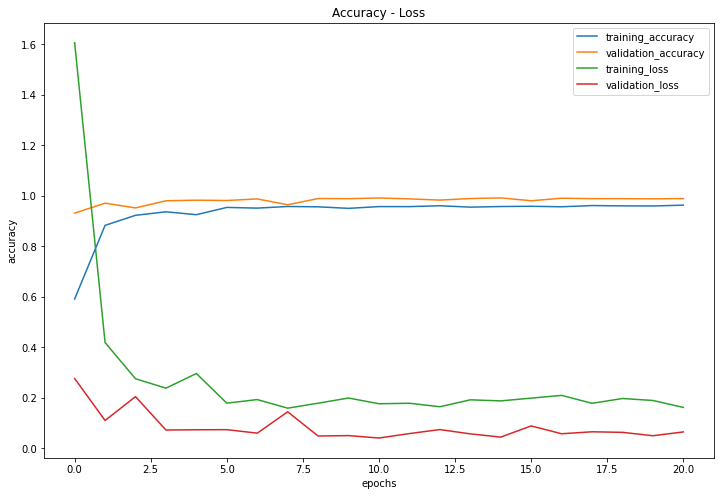

In [28]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Accuracy - Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data = []
    for img in imgs:
        image = Image.open(os.path.join('data', img))
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label
        

In [22]:
X_test, label = testing(os.path.join('data', 'Test.csv'))

In [23]:
label

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [24]:
pred = np.argmax(model.predict(X_test), axis=1)

In [25]:
pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, pred))

0.9582739509105305


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(pred, label))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.99      0.93      0.96       762
           2       0.98      0.98      0.98       755
           3       0.93      0.95      0.94       441
           4       0.97      0.98      0.97       650
           5       0.92      0.92      0.92       632
           6       0.85      0.99      0.91       128
           7       0.98      0.97      0.98       455
           8       0.99      0.97      0.98       458
           9       1.00      0.99      0.99       487
          10       0.98      1.00      0.99       647
          11       0.96      0.89      0.92       454
          12       0.96      0.98      0.97       674
          13       0.99      0.98      0.99       725
          14       0.92      1.00      0.96       249
          15       1.00      0.83      0.91       254
          16       1.00      0.96      0.98       156
          17       1.00    

In [27]:
model.save('./training/TSR.h5')